## Session #1 Homework

### Question 1

In [1]:
# What's the version of NumPy that you installed?
import numpy as np
np.__version__

'1.20.3'

### Question 2

In [2]:
# What's the version of Pandas?
import pandas as pd
pd.__version__

'1.3.2'

### Getting the data

In [3]:
data = pd.read_csv('car-price-data-ML ZoomCamp - Session 1.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Question 3

In [4]:
# What's the average price of BMW cars in the dataset?
grouped_data = data.groupby('Make')['MSRP'].agg(['mean'])
grouped_data.loc['BMW']

mean    61546.763473
Name: BMW, dtype: float64

### Question 4

In [5]:
# Select a subset of cars after year 2015 (inclusive, i.e. 2015 and after). How many of them have missing values for Engine HP?
Year_after_2015 = (data[data.Year >= 2015]) 
missing_HP_after_2015 = Year_after_2015['Engine HP'].isnull().sum()
missing_HP_after_2015

51

### Question 5

In [7]:
# Calculate the average "Engine HP" in the dataset.
mean_hp_before = data['Engine HP'].mean()
print(round(mean_hp_before))

# Use the fillna method and to fill the missing values in "Engine HP" with the mean value from the previous step.
data['Engine HP'].fillna(mean_hp_before, inplace=True)

# Now, calcualte the average of "Engine HP" again.
mean_hp_after = data['Engine HP'].mean()
print(round(mean_hp_after))

# Has it changed?
# No Change

249
249


### Question 6

In [8]:
# Select all the "Rolls-Royce" cars from the dataset.
rolls_royce_data = data[data['Make'] == 'Rolls-Royce']

# Select only columns "Engine HP", "Engine Cylinders", "highway MPG".
select_rr = rolls_royce_data[['Engine HP','Engine Cylinders','highway MPG']]

# Now drop all duplicated rows using drop_duplicates method (you should get a dataframe with 7 rows).
unduplicated_rr = select_rr.drop_duplicates()

# Get the underlying NumPy array. Let's call it X.
X = unduplicated_rr.values
X

array([[325.,   8.,  15.],
       [563.,  12.,  19.],
       [563.,  12.,  21.],
       [563.,  12.,  20.],
       [322.,  12.,  15.],
       [453.,  12.,  19.],
       [624.,  12.,  21.]])

In [9]:
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
XTX = (X.T).dot(X)
XTX

array([[1.754801e+06, 3.965600e+04, 6.519600e+04],
       [3.965600e+04, 9.280000e+02, 1.500000e+03],
       [6.519600e+04, 1.500000e+03, 2.454000e+03]])

In [10]:
# Invert XTX.
inverse_XTX = np.linalg.inv(XTX)
inverse_XTX

array([[ 5.17815728e-05,  9.06587044e-04, -1.92984188e-03],
       [ 9.06587044e-04,  1.05723058e-01, -8.87084092e-02],
       [-1.92984188e-03, -8.87084092e-02,  1.05900809e-01]])

In [11]:
# What's the sum of all the elements of the result?
total = np.sum(inverse_XTX)
print(f'Sum of all the elements is {total}')

Sum of all the elements is 0.032212320677486195


### Questions 7

In [12]:
# Create an array y with values [1000, 1100, 900, 1200, 1000, 850, 1300].
y = np.array([1000, 1100, 900, 1200, 1000, 850, 1300])
y

# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
#print(inverse_XTX * (X.T))
m = inverse_XTX.dot(X.T)
w = m.dot(y)

# What's the value of the first element of w?.
w[0]

0.19989598183186175

## Session #2 Homework

###  Create a regression model for prediction apartment prices - 

#### (using New York City Airbnb Open Data)

Datset - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.__version__

'0.11.2'

#### EDA
Load the data.

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Look at the price variable. Does it have a long tail?

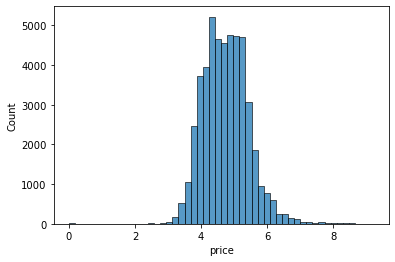

In [74]:
data.price.describe()

# Computing the log of price column values:
price_logs = np.log1p(data.price)

# plotting the logarithmic price column values:
sns.histplot(price_logs,bins=50)
plt.show()

Plotting the logarithmic values of price column shows that price variable has a long tail towards the right.

#### Features

In [75]:
# Select only specific columns from dataset for future use.
features = data[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']]

features.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [76]:
features.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [77]:
features['minimum_nights'].describe()   # 50th percentile is the same as the median

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

#### Split the data

In [78]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(data)

n_val = int(n * 0.2)   # split 20% into validation set
n_test = int(n * 0.2)  # split 20% into testing set
n_train = n - n_val - n_test  # remaining training set
n, n_val + n_test + n_train

(48895, 48895)

In [79]:
# getting the size of the splitted datasets:
n_val, n_test, n_train

(9779, 9779, 29337)

In [80]:
# Shuffle the initial dataset, use seed 42.
idx = np.arange(n)
np.random.seed(42)

np.random.shuffle(idx)  # shuffle the data from index
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [81]:
# getting the rows for each set from the shuffled indices:
df_val = data.iloc[idx[:n_val]]
df_test = data.iloc[idx[n_val:n_val+n_test]]
df_train = data.iloc[idx[n_val + n_test:]]

print(df_val.shape, df_test.shape,df_train.shape)

(9779, 16) (9779, 16) (29337, 16)


In [82]:
# Slicing out price column from the 3 split sets and assign to y variables for each:
# # Apply the log transformation to the price variable using the np.log1p() function.
y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [83]:
# Make sure that the target value ('price') is not in your dataframe.
# deleting the price column from Feature matrices of train, validation and test set:
del df_train['price']
del df_val['price']
del df_test['price']

print(df_val.shape, df_test.shape,df_train.shape)

(9779, 15) (9779, 15) (29337, 15)


### Question 3

#### Option 1 - Filling NaN with 0 - Training  a linear regression model without regularization -

In [84]:
subset_features = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

In [85]:
# Creating a function to extract a subset of a df as an array - 
def prepare_X(df):
    
    df_num = df[subset_features]  # feature columns we want in our feature matrix subset
    df_num = df_num.fillna(0)  # fill missing values with zeros
    X = df_num.values   # extracting only values of subset as a Numpy array
    return X

In [86]:
# slicing only above feature columns to create a subset of training dataset:
X_train = prepare_X(df_train)

In [87]:
# Creating a function to predict car price's using 3 features - 
def train_linear_regression(X,y):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 5 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 6 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

In [88]:
# Running the Linear regression model (function) for the training sets to get weights w0 and w:
w0, w = train_linear_regression(X_train, y_train)

# computing target variable y_pred -
# using weights w0 and w to compute the target variable y_pred:
y_pred = w0 + X_train.dot(w)
y_pred

array([4.87791291, 4.81288069, 5.55153718, ..., 5.02356152, 4.88478955,
       4.66641733])

In [89]:
# Creating a function to calculate the RMSE of actual target variable vs. predicted target variables:
def rmse(y,y_pred):
    # computing the squared error first:
    se = (y - y_pred) ** 2  
    # computing the mean of squared errors computed:
    mse = se.mean()
    # returning the square root of squared error:
    return np.sqrt(mse)

#### Option 2 - Filling NaN with Mean value - Training a linear regression model without regularization -

In [90]:
# Creating a function to extract a subset of a df as an array - 
def prepare_X2(df):
    df_num = df[subset_features]  # feature columns we want in our feature matrix subset
    df_num = df_num.fillna(df_train['reviews_per_month'].mean())  # fill missing values with mean of column
    X2 = df_num.values   # extracting only values of subset as a Numpy array
    return X2

In [91]:
# slicing only above feature columns to create a subset of training dataset:
X_train_2 = prepare_X2(df_train)

In [92]:
# Creating a function to predict car price's using 3 features - 
def train_linear_regression2(X,y):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 5 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 6 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

In [93]:
# Running the Linear regression model (function) for the training sets to get weights w0 and w:
w0, w = train_linear_regression2(X_train_2, y_train)

# computing target variable y_pred -
# using weights w0 and w to compute the target variable y_pred:
y_pred = w0 + X_train_2.dot(w)
y_pred

array([4.86744762, 4.80488808, 5.54883838, ..., 5.01686784, 4.87418674,
       4.65564306])

In [94]:
# Creating a function to calculate the RMSE of actual target variable vs. predicted target variables:
def rmse2(y,y_pred):
    # computing the squared error first:
    se = (y - y_pred) ** 2  
    # computing the mean of squared errors computed:
    mse = se.mean()
    # returning the square root of squared error:
    return np.sqrt(mse)

#### Use the validation dataset to evaluate the models and compare the RMSE of each option.

Option 1 - Filling NaN with 0

In [95]:
# slicing subset feature array on to create a validation set:
X_val = prepare_X(df_val)

y_pred = w0 + X_val.dot(w)   # computing the predicted target variable y for validation set
val_score = rmse(y_val, y_pred)   # computing the rmse for validation set

Option 2 - Filling NaN with Mean value

In [96]:
# slicing subset feature array on to create a validation set:
X_val = prepare_X2(df_val)

y_pred = w0 + X_val.dot(w)   # computing the predicted target variable y for validation set
val_score2 = rmse2(y_val, y_pred)   # computing the rmse for validation set

Which option gives better RMSE?

In [97]:
# ound the RMSE scores to 2 decimal digits using round(score, 2)
print('Option 1 RMSE:',round(val_score,2))
print('Option 2 RMSE:',round(val_score2,2))

Option 1 RMSE: 0.64
Option 2 RMSE: 0.64


Both Options give almost same RMSE value on validation set.

### Question 4

Now let's train a regularized linear regression. 

For this question, fill the NAs with 0.

In [98]:
# Creating a Regularized function to predict price using features - 
def train_linear_regression_reg(X,y,r):
    # Step 1 - adding ones for bias term in features matrix - using np.ones() function:
    ones = np.ones(X.shape[0])
    # Step 2 - stacking the array for ones generated in Step 1 to the features' matrix:
    X = np.column_stack([ones, X])
    
    # Step 3 - compute the gram matrix by dot product of X matrix with X transpose:
    XTX = X.T.dot(X)
    # Step 4 - # add the alpha term r to diagonals of matrix use np.eye() function:
    XTX = XTX + r * np.eye(XTX.shape[0])   
    
    # Step 5 - compute the inverse of XTX computes in Step 3 - using np.linalginv() function:
    XTX_inv = np.linalg.inv(XTX)
    
    # Step 6 - compute the weights of the entire car data using dot product multiplication with target variable y:
    w_full = XTX_inv.dot(X.T).dot(y)
    
    # Step 7 - return the computed intercept or bias term and rest of factors of linear regression equation:
    return w_full[0], w_full[1:]

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    
Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

In [107]:
# Using the newly created Regularized function:
# Finding the best regularization parameter, r for our Linear Regression model - 
# taking a series of r values to test our model and find the RMSE score for each:
for m in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    X_train = prepare_X(df_train)   # function replaces NaN with zeros
    wo, w = train_linear_regression_reg(X_train, y_train,r=m)   # training set
    
    X_val = prepare_X(df_val)    # validation set
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)   # comparing actual vs prediction target variable in validation set
    print(m, round(w0,2), 'RMSE :',round(score,2))

0 -385.59 RMSE : 29.68
1e-06 -385.59 RMSE : 29.63
0.0001 -385.59 RMSE : 24.84
0.001 -385.59 RMSE : 14.15
0.01 -385.59 RMSE : 195.04
0.1 -385.59 RMSE : 353.12
1 -385.59 RMSE : 382.09
5 -385.59 RMSE : 384.88
10 -385.59 RMSE : 385.23


#### Which r gives the best RMSE?
r = 0.0001 gives a RMSE of 8.42 which is low but not extremely low.

### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

In [100]:
RMSE_scores = []

for a in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    n = len(data)

    # Shuffle the initial dataset, use different seed values from list:
    np.random.seed(a)
    
    idx = np.arange(n)
    np.random.shuffle(idx)# shuffle the data from index
    
    n_val = int(n * 0.2)   # split 20% into validation set
    n_test = int(n * 0.2)  # split 20% into testing set
    n_train = n - n_val - n_test  # remaining training set


    # getting the rows for each set from the shuffled indices:
    df_val = data.iloc[idx[:n_val]]
    df_test = data.iloc[idx[n_val:n_val+n_test]]
    df_train = data.iloc[idx[n_val + n_test:]]
   
    # Slicing out price column from the 3 split sets and assign to y variables for each:
    # # Apply the log transformation to the price variable using the np.log1p() function.
    y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    

    # Make sure that the target value ('price') is not in your dataframe.
    # deleting the price column from Feature matrices of train, validation and test set:
    del df_train['price']
    del df_val['price']
    del df_test['price']

    X_train = prepare_X(df_train)   # function replaces NaN with zeros
       
    # Training a model without regularization:
    wo, w = train_linear_regression(X_train, y_train)   # training set

    X_val = prepare_X(df_val) # validation set
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)   # comparing actual vs prediction target variable in validation set
    
    print(a, idx, round(w0,2),'RMSE:',round(score,2))   
    RMSE_scores.append(score)

RMSE_std = np.std(RMSE_scores)

0 [43813 32734 25276 ... 42613 43567  2732] -443.49 RMSE: 23.14
1 [18907 46663 19757 ...  5192 12172 33003] -443.49 RMSE: 7.64
2 [22043 39679 45220 ...  6637 35343 23720] -443.49 RMSE: 19.56
3 [ 6920 38903 30764 ... 11513  1688  5994] -443.49 RMSE: 17.6
4 [25022 38145  2095 ... 27063  8366 17530] -443.49 RMSE: 19.35
5 [20531 20353 26436 ... 20463 18638 35683] -443.49 RMSE: 26.13
6 [27383  7800 18787 ... 42964 41187 31626] -443.49 RMSE: 22.89
7 [13636 25054 15227 ...   919 38467 10742] -443.49 RMSE: 20.78
8 [42099 22672  8754 ... 18417 25940  4547] -443.49 RMSE: 21.53
9 [25415  1329 31738 ... 22584   501 20828] -443.49 RMSE: 28.24


In [101]:
np.std(RMSE_scores)

5.302255023811292

In [102]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std:
RMSE_std

# Round the result to 3 decimal digits:
(round(RMSE_std, 3))

5.302

### Question 6

In [103]:
# Split the dataset like previously, use seed 9.
n = len(data)

# Shuffle the initial dataset, use different seed values from list:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)# shuffle the data from index
    
n_val = int(n * 0.2)   # split 20% into validation set
n_test = int(n * 0.2)  # split 20% into testing set
n_train = n - n_val - n_test  # remaining training set

# getting the rows for each set from the shuffled indices:
df_val = data.iloc[idx[:n_val]]
df_test = data.iloc[idx[n_val:n_val+n_test]]
df_train = data.iloc[idx[n_val + n_test:]]
   
# Slicing out price column from the 3 split sets and assign to y variables for each:
# # Apply the log transformation to the price variable using the np.log1p() function.
y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
    

# Make sure that the target value ('price') is not in your dataframe.
# deleting the price column from Feature matrices of train, validation and test set:
del df_train['price']
del df_val['price']
del df_test['price']

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

In [104]:
df_full_train = pd.concat([df_train,df_val])
# resetting index of combined training set:
df_full_train = df_full_train.reset_index(drop=True)

# Combining features matrix for training and validation set using full training set as input to the prepare_X  function:
X_full_train = prepare_X(df_full_train)
X_full_train 

# Combining y target variable array of training and validation set:
y_full_train = np.concatenate([y_train, y_val])
y_full_train


# Running the Regularized linear regression model and calculating the RMSE score on testing dataset:
w0, w = train_linear_regression_reg(X_full_train,y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

# What's the RMSE on the test dataset?
score

0.6404588269895755

## Session #3 Homework

Datset - continue the New York City Airbnb Open Data

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [59]:
data.shape

(48895, 16)

#### Features - 

Features from the previous homework with additional two 'neighbourhood_group' and 'room_type'

In [60]:
features = data[['neighbourhood_group','room_type','latitude','longitude','price','minimum_nights','number_of_reviews',
            'reviews_per_month','calculated_host_listings_count','availability_365']]

features.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


Select only them and fill in the missing values with 0.

In [61]:
# before filling NaN:
features.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [62]:
# after filling NaN with zeros:
features = features.fillna(0)
features.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [63]:
# Method 1 - using mode() function
features.neighbourhood_group.mode()

0    Manhattan
dtype: object

In [64]:
# Method 2 - using value_counts() and selecting the first row variable:
features['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

#### Split the data - 

In [249]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
from sklearn.model_selection import train_test_split

# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Step 1 - splitting dataset into full train and test sets first:
df_full_train, df_test = train_test_split(features, test_size=0.20,random_state=42) 

# Step 2 - splitting full train set again into training set and validation set:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state = 42)

# getting the size of train, vaidation and test set:
df_train.shape, df_val.shape, df_test.shape

((29337, 10), (9779, 10), (9779, 10))

In [66]:
# Getting our target variable column (price) subsets as respective Numpy arrays:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

# Make sure that the target value ('price') is not in your dataframe.
del df_train['price']
del df_val['price']
del df_test['price']

# getting the size of train, vaidation and test set after deleting price column:
df_train.shape, df_val.shape, df_test.shape

((29337, 9), (9779, 9), (9779, 9))

### Question 2

In [67]:
# getting the datatypes of columns in train dataset:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 13575 to 20523
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             29337 non-null  object 
 1   room_type                       29337 non-null  object 
 2   latitude                        29337 non-null  float64
 3   longitude                       29337 non-null  float64
 4   minimum_nights                  29337 non-null  int64  
 5   number_of_reviews               29337 non-null  int64  
 6   reviews_per_month               29337 non-null  float64
 7   calculated_host_listings_count  29337 non-null  int64  
 8   availability_365                29337 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.2+ MB


In [68]:
# slicing only numerical feature columns of train dataset:
numerical = ['latitude','longitude','minimum_nights','number_of_reviews', 'reviews_per_month',
             'calculated_host_listings_count', 'availability_365']

In [69]:
# Creating the correlation matrix for the numerical features of your train dataset:
df_full_train[numerical].corr()   # using corr() function

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080704,0.025497,-0.011836,-0.013809,0.020299,-0.008341
longitude,0.080704,1.000000,-0.063498,0.057570,0.134401,-0.115289,0.082994
minimum_nights,0.025497,-0.063498,1.000000,-0.077860,-0.121687,0.121748,0.140596
number_of_reviews,-0.011836,0.057570,-0.077860,1.000000,0.584935,-0.072603,0.175428
reviews_per_month,-0.013809,0.134401,-0.121687,0.584935,1.000000,-0.047368,0.165565
calculated_host_listings_count,0.020299,-0.115289,0.121748,-0.072603,-0.047368,1.000000,0.223328
availability_365,-0.008341,0.082994,0.140596,0.175428,0.165565,0.223328,1.000000


In [70]:
# Creating the correlation for the numerical features of your train dataset with target column, price:
df_full_train[numerical].corrwith(df_full_train.price).sort_values(ascending = False)   # using corr() function

# sorting in descending order

availability_365                  0.080562
calculated_host_listings_count    0.055336
minimum_nights                    0.042740
latitude                          0.035015
number_of_reviews                -0.048926
reviews_per_month                -0.051978
longitude                        -0.149080
dtype: float64

What are the two features that have the biggest correlation in this dataset?

availability_365 

calculated_host_listings_count

### Make price binary

We need to turn the price variable from numeric into binary.

Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

from sklearn.feature_extraction import DictVectorizer

 Step 1 turning each row into a dictionary using to_dict() function with orient argument records:
dicts = df_full_train[['availability_365','calculated_host_listings_count']].iloc[:10].to_dict(orient='records') # first 10 rows

 Step 2 - creating an instance of the class DictVectorizer()
dv = DictVectorizer(sparse=False)   # turns off result as a sparse matrix instead produces a Numpy array

 Step 3 - training DictVectorizer with our data using fit() method:
dv.fit(dicts)

 Step 4 - transforming the vectorizer to our data subset:
transformed_vector = dv.transform(dicts)   # results in a sparse matrix as most values are zero

if transformed_vector[0][2] >= 152:
    above_average = 1

### Question 3

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.

In [71]:
# Implementing mutual information in sklearn:
from sklearn.metrics import mutual_info_score

categ_features = ['neighbourhood_group','room_type']

# Computing the Mutual information score for all feature columns - using apply() function:
# Step 1 - embedding the mutual_info_score function in another function - 
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.price)

# Step 2 - calling above function in apply() function so as to apply it to each column from df - 
score = df_full_train[categ_features].apply(mutual_info_price_score)  # here applied only to 2 categorical columns

# Round it to 2 decimal digits using round(score, 2):
score.sort_values(ascending=False).round(2)

room_type              0.31
neighbourhood_group    0.11
dtype: float64

Which of these two variables has bigger score?

room_type

### Question 4

Now let's train a logistic regression

Remember that we have two categorical variables in the data. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [72]:
from sklearn.feature_extraction import DictVectorizer

# Step 1 - Including two categorical variables using one-hot encoding - 
# creating an instance of the class DictVectorizer()
dv = DictVectorizer(sparse=False)   # turns off result as a sparse matrix instead produces a Numpy array

train_dicts = df_train[categ_features + numerical].to_dict(orient='records')

# Combined fit and transform dictionary - for training dataset:
X_train = dv.fit_transform(train_dicts)

# Step 2 - repeating above process for validation dataset:
# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[categ_features + numerical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [73]:
# Step 3 - Fitting the model on the training dataset -
from sklearn.linear_model import LogisticRegression

# intitiating Log. regression model and trainingit on our full train set:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42) 

# solver='lbfgs'  - default solver in newer version of sklearn, need to specify it explicitly for older versions

model.fit(X_train,y_train)

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [74]:
# model intercept: Bias Term (w0)
print("w0 = ", model.intercept_[0])

print()

# Coeffficients: Weights (wi)
print("wi = ",model.coef_[0].round(3))

w0 =  0.00014222330952529745

wi =  [-0.002 -0.007  0.006 -0.01   0.005  0.     0.001 -0.001 -0.    -0.
  0.018  0.001 -0.001  0.     0.   ]


In [233]:
# Step 4 - Calculating the accuracy on the validation dataset and round it to 2 decimal digits.
# for validation set:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00029532, 0.00025794, 0.00034261, ..., 0.0002716 , 0.00026713,
       0.00027352])

In [84]:
# encoding the actual target variable column, price as binary -
# Creating a variable above_average which is 1 if the price is above (or equal to) 152.
binary_price = []
for i in range(len(y_val)):
    if y_val[i] >= 152:
        above_average = 1
        binary_price.append(above_average)
    else:
        below_average = 0
        binary_price.append(below_average)

In [93]:
# Making price decision using probability threshold of 0.5
price_decision = (y_pred >= 0.5)

In [96]:
# Observe the above result in a dataset
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = price_decision.astype(int)
df_pred['actual'] = binary_price   # using the encoded binary price variable as actual price column, y_val

df_pred['correct'] = df_pred.prediction == df_pred.actual

# Accuracy Rate: mean of correct predictions
display(df_pred)
display("Accuracy Rate: ", df_pred['correct'].mean().round(2))   #(y_val == price_decision).mean()

,probability,prediction,actual,correct
0,0.000295,0,0,True
1,0.000258,0,0,True
2,0.000343,0,1,False
3,0.000271,0,0,True
4,0.000236,0,1,False
...,...,...,...,...
9774,0.000269,0,1,False
9775,0.000308,0,0,True
9776,0.000272,0,0,True
9777,0.000267,0,0,True


'Accuracy Rate: '

0.69

### Question 5 

We have 9 features: 7 numerical features and 2 categorical.

Let's find the least useful one using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
neighbourhood_group

room_type

number_of_reviews

reviews_per_month

In [97]:
# getting the list of all features in the vectorizer:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [126]:
# Joining the feature_names with respective coefficients - using zip function:
feature_weights = dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))
feature_weights

{'availability_365': -0.002,
 'calculated_host_listings_count': -0.007,
 'latitude': 0.006,
 'longitude': -0.01,
 'minimum_nights': 0.005,
 'neighbourhood_group=Bronx': 0.0,
 'neighbourhood_group=Brooklyn': 0.001,
 'neighbourhood_group=Manhattan': -0.001,
 'neighbourhood_group=Queens': -0.0,
 'neighbourhood_group=Staten Island': -0.0,
 'number_of_reviews': 0.018,
 'reviews_per_month': 0.001,
 'room_type=Entire home/apt': -0.001,
 'room_type=Private room': 0.0,
 'room_type=Shared room': 0.0}

In [101]:
# Step 1 - Training a model with all these features (using the same parameters as in Q4):
model.fit(X_train,y_train)

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [102]:
# Step 2 - Calculating the original accuracy for model (with all features):
y_pred = model.predict_proba(X_val)[:,1]

(binary_price == price_decision).mean()

0.6934246855506698

In [241]:
# Step 3 - Now excluding each feature from this set and train a model without it and recording the accuracy for each model.
# creating an instance of the class DictVectorizer()
dv = DictVectorizer(sparse=False)   # turns off result as a sparse matrix instead produces a Numpy array

train_dicts = df_train[categ_features + numerical].to_dict(orient = 'records')

# Combined fit and transform dictionary - for training dataset:
X_train = dv.fit_transform(train_dicts)

# Step 2 - repeating above process for validation dataset:
# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[categ_features + numerical].to_dict(orient = 'records')

X_val = dv.transform(val_dicts)

In [242]:
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r

In [243]:
val_dicts_2 = removekey(val_dicts[0], 'neighbourhood_group')
val_dicts_2

{'room_type': 'Private room',
 'latitude': 40.70239,
 'longitude': -73.92931,
 'minimum_nights': 1,
 'number_of_reviews': 35,
 'reviews_per_month': 1.8,
 'calculated_host_listings_count': 1,
 'availability_365': 52}

In [244]:
X_val_new = dv.transform([val_dicts_2])
X_val_new

array([[ 52.     ,   1.     ,  40.70239, -73.92931,   1.     ,   0.     ,
          0.     ,   0.     ,   0.     ,   0.     ,  35.     ,   1.8    ,
          0.     ,   1.     ,   0.     ]])

In [245]:
model.predict_proba(X_val_new)[0,1]

0.0002964699340285137

In [246]:
val_dicts_3 = removekey(val_dicts[0], 'room_type')
X_val_new2 = dv.transform([val_dicts_3])
model.predict_proba(X_val_new2)[0,1]

0.000298983068865423

In [247]:
# Step 3 - Fitting the model on the training dataset -
from sklearn.linear_model import LogisticRegression

# intitiating Log. regression model and trainingit on our full train set:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42) 

# solver='lbfgs'  - default solver in newer version of sklearn, need to specify it explicitly for older versions

model.fit(X_train,y_train)

# Step 4 - Calculating the accuracy on the validation dataset and round it to 2 decimal digits.
# for validation set:
y_pred = model.predict_proba(X_val_new)[:,1]

(binary_price == price_decision).mean()

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6934246855506698

In [225]:
# Step 4 - Calculating the difference between the original accuracy and the accuracy without the feature:


### Question 6

In [250]:
# We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
y_train = np.log1p(df_train.price.values)   # getting numpy arrays instead of Pandas series for target variable
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [285]:
# Fit the Ridge regression model on the training data.
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# defining the model:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a)
    
    model.fit(X_train, y_train)
    
    # evaluate model calculated as RMSE:
    pred = model.predict(X_val) 
    rms = mean_squared_error(y_val, pred,squared=False)
    
    # printing alpha and corresponding RMSE:
    print('alpha:  ', a, 'RMSE: ',rms.round(3))

alpha:   0 RMSE:  0.497
alpha:   0.01 RMSE:  0.497
alpha:   0.1 RMSE:  0.497
alpha:   1 RMSE:  0.497
alpha:   10 RMSE:  0.498


Best alpha - 0.01 as it gives least error

## Session #4 Homework

Use this notebook as a starter - https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/04-evaluation/homework-4-starter.ipynb

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Preparation

In [150]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [151]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [152]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [153]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status:

In [154]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable:

In [155]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [156]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


In [158]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


##### What are the categorical variables? What are the numerical?

In [159]:
categorical = ['home', 'marital', 'records', 'job']   

In [160]:
numerical = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price']   

In [161]:
all_features = (categorical + numerical)

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [162]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
from sklearn.model_selection import train_test_split

# Use Scikit-Learn for that (the train_test_split function) and set the seed to 1.
# Step 1 - splitting dataset into full train and test sets first:
df_full_train, df_test = train_test_split(df, test_size=0.20,random_state=1) 

# Step 2 - splitting full train set again into training set and validation set:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state = 1)

# getting the size of train, vaidation and test set:
df_train.shape, df_val.shape, df_test.shape

((2672, 14), (891, 14), (891, 14))

In [163]:
# Getting our target variable column (price) subsets as respective Numpy arrays:
y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

# Make sure that the target value ('price') is not in your dataframe.
del df_train['default']
del df_val['default']
del df_test['default']

# getting the size of train, vaidation and test set after deleting price column:
df_train.shape, df_val.shape, df_test.shape

((2672, 13), (891, 13), (891, 13))

### Question 1

For each numerical variable, use it as score and compute AUC with the "default" variable

Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [219]:
numerical_target = ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price']  

for i in numerical_target:
    a = df[[i, 'default']].corr() 
    print(a)

           seniority   default
seniority   1.000000 -0.260393
default    -0.260393  1.000000
             time   default
time     1.000000  0.100627
default  0.100627  1.000000
              age   default
age      1.000000 -0.095301
default -0.095301  1.000000
          expenses   default
expenses  1.000000  0.028855
default   0.028855  1.000000
           income   default
income   1.000000 -0.214079
default -0.214079  1.000000
           assets   default
assets   1.000000 -0.097857
default -0.097857  1.000000
             debt   default
debt     1.000000  0.010011
default  0.010011  1.000000
           amount   default
amount   1.000000  0.154549
default  0.154549  1.000000
           price  default
price    1.00000  0.01074
default  0.01074  1.00000


In [220]:
from sklearn.metrics import roc_auc_score
#roc_auc_score(y_true, y_pred)
# Feature is predictions, and target is true values.
auc_score = round(roc_auc_score(y_train, -df_train['seniority']),3)
auc_score

0.702

In [221]:
auc_score = round(roc_auc_score(y_train, df_train['time']),3)
auc_score

0.561

In [222]:
auc_score = round(roc_auc_score(y_train, -df_train['income']),3)
auc_score

0.687

In [223]:
auc_score = round(roc_auc_score(y_train, -df_train['debt']),3)
auc_score

0.501

Which numerical variable (among the following 4) has the highest AUC?

Ans. seniority

In [224]:
from sklearn.metrics import roc_auc_score

for i in df_train[numerical].columns:
    # auc scores
    auc_score = round(roc_auc_score(y_train, df_train[i]),3)
    if auc_score < 0.5:
        new_auc = (auc_score * -1)
    else:
        new_auc = auc_score
    print(i, auc_score, new_auc)

seniority 0.298 -0.298
time 0.561 0.561
age 0.433 -0.433
expenses 0.501 0.501
income 0.313 -0.313
assets 0.365 -0.365
debt 0.499 -0.499
amount 0.588 0.588
price 0.486 -0.486


Which numerical variable (among the following 4) has the highest AUC?

Ans. seniority

#### Training the model

From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [170]:
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']

from sklearn.feature_extraction import DictVectorizer

# Step 1 - Including above feature columns when using one-hot encoding - 
# creating an instance of the class DictVectorizer()
dv = DictVectorizer(sparse=False)   # turns off result as a sparse matrix instead produces a Numpy array

train_dicts = df_train[features].to_dict(orient='records')

# Combined fit and transform dictionary - for training dataset:
X_train = dv.fit_transform(train_dicts)

# Step 2 - Fitting the Logistic regresseion model on the training dataset -
from sklearn.linear_model import LogisticRegression

# intitiating Log. regression model and training it on our full train set:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42,max_iter=1000) 
model.fit(X_train,y_train)

# Step 3 - repeating above process for validation dataset:
# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[features].to_dict(orient='records')

X_val = dv.transform(val_dicts)

# predicting on the validation dataset and round it to 3 decimal digits:
y_pred = model.predict(X_val)

In [171]:
# Step 4 - Calculating the accuracy on the validation dataset and round it to 3 decimal digits.
# for validation set:
from sklearn.metrics import roc_auc_score

AUC_score = round(roc_auc_score(y_val, y_pred),3)
AUC_score

0.682

### Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

Ans. 0.612

### Question 3

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

In [172]:
# computing TPR and FPR for any model as a Function:
scores = []

# Step 1 - get all the possible threshold values - using arange() function:
thresholds = np.arange(0.0, 1.0, 0.1)

    # Step 2 - for all threshold levels getting the confusion tables as list of tuples, scores:
for t in thresholds:
    # Actual default and not default - as binary arrays::
    actual_positive = (y_val == 1)  # customers actually going to default 
    actual_negative = (y_val == 0)  # customers actually not going to default

    # Predicting default and not default - as binary arrays:
    predict_positive = (y_pred >= t)  # predict that customers are going to default
    predict_negative = (y_pred < t)   # predict that customers are not going to default

    # Combining predictions and actuals - using logical operators in Numpy:
    # computing True Positives - 
    tp = (predict_positive & actual_positive).sum()  # returns true only if both are True

    # computing True Negatives -
    tn = (predict_negative & actual_negative).sum()

    # computing False Positives -
    fp = (predict_positive & actual_negative).sum()

    # computing False Negatives -
    fn = (predict_negative & actual_positive).sum()
    
    # computing precision and recall - 
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append((t, tp, fp, fn, tn, precision, recall))

In [173]:
 # Step 3 - putting all the confusion matrices created for each threshold into a DataFrame:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall']  # specifying column names for df
df_scores = pd.DataFrame(scores, columns=columns)

df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,246,645,0,0,0.276094,1.000000
1,0.1,114,64,132,581,0.640449,0.463415
2,0.2,114,64,132,581,0.640449,0.463415
3,0.3,114,64,132,581,0.640449,0.463415
4,0.4,114,64,132,581,0.640449,0.463415
5,0.5,114,64,132,581,0.640449,0.463415
6,0.6,114,64,132,581,0.640449,0.463415
7,0.7,114,64,132,581,0.640449,0.463415
8,0.8,114,64,132,581,0.640449,0.463415
9,0.9,114,64,132,581,0.640449,0.463415


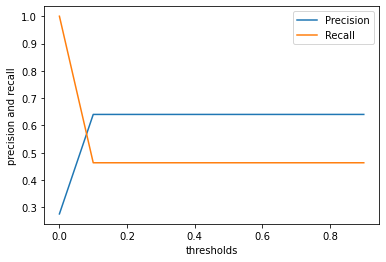

In [174]:
# Step 5 - plotting the Precision and Recall using different thresholds:
plt.plot(df_scores.threshold, df_scores['precision'],label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'],label='Recall')
plt.xlabel('thresholds')
plt.ylabel('precision and recall')
plt.legend()

plt.show()

At which threshold precision and recall curves intersect?

Ans. 0.2

### Question 4

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [175]:
# computing TPR and FPR for any model as a Function:
scores = []

# Step 1 - get all the possible threshold values - using arange() function:
thresholds = np.arange(0.0, 1.0, 0.1)

    # Step 2 - for all threshold levels getting the confusion tables as list of tuples, scores:
for t in thresholds:
    # Actual default and not default - as binary arrays::
    actual_positive = (y_val == 1)  # customers actually going to default 
    actual_negative = (y_val == 0)  # customers actually not going to default

    # Predicting default and not default - as binary arrays:
    predict_positive = (y_pred >= t)  # predict that customers are going to default
    predict_negative = (y_pred < t)   # predict that customers are not going to default

    # Combining predictions and actuals - using logical operators in Numpy:
    # computing True Positives - 
    tp = (predict_positive & actual_positive).sum()  # returns true only if both are True

    # computing True Negatives -
    tn = (predict_negative & actual_negative).sum()

    # computing False Positives -
    fp = (predict_positive & actual_negative).sum()

    # computing False Negatives -
    fn = (predict_negative & actual_positive).sum()
    
    # computing precision and recall - 
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    # computing F1 score - F1 = 2 * P * R / (P + R)
    F1 = 2 * precision * recall / (precision + recall)

    scores.append((t, F1))

    # Step 3 - putting all the confusion matrices created for each threshold into a DataFrame:
    columns = ['threshold', 'F1_score']  # specifying column names for df
    df_scores = pd.DataFrame(scores, columns=columns)
    
df_scores

,threshold,F1_score
0,0.0,0.432718
1,0.1,0.537736
2,0.2,0.537736
3,0.3,0.537736
4,0.4,0.537736
5,0.5,0.537736
6,0.6,0.537736
7,0.7,0.537736
8,0.8,0.537736
9,0.9,0.537736


At which threshold F1 is maximal?

Ans. 0.7

### Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation

In [176]:
# Step 1 -
# Function 1 - Creating a function to train our DataFrame:
def train(df_train, y_train):
    dicts = df_train[features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)     # C parameter is equivalent to regularization parameter
    model.fit(X_train, y_train)
    
    return dv, model

In [177]:
dv, model = train(df_train, y_train) 

In [178]:
# Step 2 - 
# Function 2 - Creating another function to predict:
def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')  # converts df to list of dictionaries
    
    X = dv.transform(dicts)  # creates a feature matrix using the vectorizer
    
    y_pred = model.predict_proba(X)[:, 1]  # uses the model
    
    return y_pred

In [179]:
y_pred = predict(df_val, dv, model)

In [180]:
# Library to track each iteration in a Cross Validation run
from tqdm.auto import tqdm

# Step 3 - Using the K-fold Cross Validation and above 2 created functions - 
from sklearn.model_selection import KFold

In [181]:
n_splits = 5

for C in tqdm([0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
   
    scores = []
    
    
    for train_idx, val_idx in kfold.split(df_full_train):
        
        # Selecting part of dataset as 3 subsets for model:
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values   # our target variable values as Numpy array for train and validation sets
        y_val = df_val.default.values

        dv, model = train(df_train, y_train)   # using train function created
        y_pred = predict(df_val, dv, model)   # using predict function created

        # compute auc for ROC Curve:
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        # Computing mean of scores and std deviation of score:
    print('%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/8 [00:00<?, ?it/s]

0 0.814 +- 0.015
0.001 0.814 +- 0.015
0.01 0.814 +- 0.015
0.1 0.814 +- 0.015
0.5 0.814 +- 0.015
1 0.814 +- 0.015
5 0.814 +- 0.015
10 0.814 +- 0.015


How large is standard devidation of the AUC scores across different folds?

Ans. 0.014

### Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]

Initialize KFold with the same parameters as previously

Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [182]:
# Step 1 -
# Function 1 - Creating a function to train our DataFrame:
def train(df_train, y_train,C):
    dicts = df_train[features].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)     # C parameter is equivalent to regularization parameter
    model.fit(X_train, y_train)

    return dv, model

In [183]:
# Step 2 - 
# Function 2 - Creating another function to predict:
def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')  # converts df to list of dictionaries
    
    X = dv.transform(dicts)  # creates a feature matrix using the vectorizer
    
    y_pred = model.predict_proba(X)[:, 1]  # uses the model
    
    return y_pred

In [184]:
for C in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
   
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        
        # Selecting part of dataset as 3 subsets for model:
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values   # our target variable values as Numpy array for train and validation sets
        y_val = df_val.default.values

        dv, model = train(df_train, y_train,C)   # using train function created
        y_pred = predict(df_val, dv, model)   # using predict function created

        # compute auc for ROC Curve:
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
        # Computing mean of scores and std deviation of score:
    print('%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

0.01 0.808 +- 0.012
0.1 0.813 +- 0.014
1 0.814 +- 0.015
10 0.814 +- 0.015


Which C leads to the best mean score?

Ans. 1 (smallest C)